# Exercise 02 - Introduction to Machine Learning Packages

## Learning objectives

- refresh main features of Numpy libraries: vectorization, broadcasting, randomization
- refresh/get an understanding of buiding, indexing, slicing numpy arrays
- refresh/get an understanding of mainl linear algebra opertions on numpy arrays
- refresh/get an understanding of relevant functionality for understanding or writing Tensorflow code


This tutorial is designed to refresh your knowledge and skill on `numpy` library and to provide anbird's eye view of other ML packages commonly used for Deep Learning (Matplotlib & Scikitlearn).
The goal is not to give an in-depth explanation of all the features of each packages, but rather demonstrate the purpose of a few widely used ML packages. For more details, we refer the reader to the packages' documentation and other online tutorials.



## Numpy

In this tutorial, we'll review  concepts that will be required for understanding and developing `Tensorflow` code.


The [Numpy](http://www.numpy.org)  package (module) is desiged to handle large multidimensional arrays and enable efficient computations with them. For these reasons is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran and the calculations are vectorized (formulated with vectors and matrices). 

To use `numpy` you need to import the module, using for example:

In [42]:
import numpy as np

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example:

* from a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

### From lists
To create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [43]:
# a vector: the argument to the array function is a Python list
v = np.array([10,12,13,14])
print ("vector from list:\n",v, '\n')

# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

print ("matrix from nested lists: \n",M)

vector from list:
 [10 12 13 14] 

matrix from nested lists: 
 [[1 2]
 [3 4]]


In [44]:
# The v and M objects are both of the type ndarray that the numpy module provides.

type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [45]:
# The number of elements in the array is available through the ndarray.size property:

M.size

4

In [46]:
# Equivalently, we could use the function `numpy.shape` and `numpy.size`

np.shape(M)

(2, 2)

So far the `numpy.ndarray` looks very much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [47]:
M.dtype

dtype('int64')

### Using array-generating functions
For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

`np.arange()`, `np.linspace()`,  `logspace()`, `mgrid random()`, `diag()`, `zeros()` and `ones()`
For details and the required key-word arguments of these functions please check the oficial documentation, e.g: 

In [48]:
?np.logspace

Signature:
np.logspace(
    start,
    stop,
    num=50,
    endpoint=True,
    base=10.0,
    dtype=None,
    axis=0,
)
Docstring:
Return numbers spaced evenly on a log scale.

In linear space, the sequence starts at ``base ** start``
(`base` to the power of `start`) and ends with ``base ** stop``
(see `endpoint` below).

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    ``base ** start`` is the starting value of the sequence.
stop : array_like
    ``base ** stop`` is the final value of the sequence, unless `endpoint`
    is False.  In that case, ``num + 1`` values are spaced over the
    interval in log-space, of which all but the last (a sequence of
    length `num`) are returned.
num : integer, optional
    Number of samples to generate.  Default is 50.
endpoint : boolean, optional
    If true, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
base : float, optional
    The base

In [49]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [51]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB
print('x:\n',x,'\n')
print('y:\n',y)

x:
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]] 

y:
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [52]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

In [53]:
from numpy import random

In [54]:
# uniform random numbers in [0,1]
random.rand(5,5)

array([[0.58794422, 0.31385745, 0.59685545, 0.15287455, 0.80481238],
       [0.74246817, 0.25671837, 0.16423078, 0.63173745, 0.68012014],
       [0.46839379, 0.24231349, 0.91086975, 0.25869323, 0.40477742],
       [0.5636273 , 0.87440957, 0.46853939, 0.83335973, 0.32053013],
       [0.858018  , 0.31105083, 0.42117594, 0.62355858, 0.79166032]])

In [55]:
# standard normal distributed random numbers
random.randn(5,5)

array([[-0.10164007,  0.50212788, -1.00113663, -0.28050823, -0.53668327],
       [-0.45583425, -0.26202313,  0.02244494,  1.90215402,  0.22154637],
       [-1.12419   , -0.56794772,  1.87302783,  0.93490055,  0.45837851],
       [-0.27265266,  0.43256943,  0.09313386,  0.63834314, -0.10689554],
       [-0.72290966,  0.52596416, -0.80932281,  0.16458695,  1.4735577 ]])

### Indexing and slicing

Numpy arrays can be indexed and sliced like regular python arrays

In [56]:
a_py = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a_np = np.array(a_py)

In [57]:
print(a_py[3:7:2])
print(a_py[2:-1:2])
print(a_py[::-1])

[4, 6]
[3, 5, 7]
[9, 8, 7, 6, 5, 4, 3, 2, 1]


### Fancy indexing

In [58]:
# You can also use arrays to index other arrays

idx = np.array([7,2])
a_np[idx]

array([8, 3])

In [59]:
# Index slicing works exactly the same way for multidimensional arrays:

A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [60]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [61]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [62]:
col_indices = [1, 2, -1] #  index -1 means the last element
row_indices = [1, 2, -1]
A[row_indices, col_indices]

array([11, 22, 44])

#### Boolean masks

We can also use index masks: If the index mask is an Numpy array of data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position of each element: 

In [63]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [64]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [65]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

In [66]:
ages = np.random.randint(low=30, high=60, size=10)
heights = np.random.randint(low=150, high=210, size=10)

print(ages)
print(heights)

[36 45 50 48 53 30 31 55 45 45]
[155 150 207 187 151 181 202 166 169 160]


In [67]:
print(ages < 50)

[ True  True False  True False  True  True False  True  True]


In [68]:
print(heights[ages < 50])
print(ages[ages < 50])

[155 150 187 181 202 169 160]
[36 45 48 30 31 45 45]


In [69]:
shuffled_idx = np.random.permutation(10)
print(shuffled_idx)
print(ages[shuffled_idx])
print(heights[shuffled_idx])

[8 2 6 0 7 3 9 5 1 4]
[45 50 31 36 55 48 45 30 45 53]
[169 207 202 155 166 187 160 181 150 151]


In [70]:
sorted_idx = np.argsort(ages)
print(sorted_idx)
print(ages[sorted_idx])
print(heights[sorted_idx])

[5 6 0 1 8 9 3 2 4 7]
[30 31 36 45 45 45 48 50 53 55]
[181 202 155 150 169 160 187 207 151 166]


## Functions for extracting data from arrays and creating arrays

In [71]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [72]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [73]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

In [74]:
# where
# The index mask can be converted to position index using the `where` function

indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [75]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

In [76]:
# take
# The `take` function is similar to fancy indexing described above:

v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [77]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [78]:
v2.take(row_indices)

array([-2,  0,  2])

In [79]:
# `take` also works on lists and other objects:

np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

In [80]:
# choose
# Constructs an array by picking elements from several arrays:

which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## Stacking and repeating arrays
Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

In [81]:
### tile and repeat
a = np.array([[1, 2], [3, 4]])
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [82]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [83]:
### concatenate
b = np.array([[5, 6]])

np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [84]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [85]:
### hstack and vstack

In [86]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [87]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

### Broadcasting

When Numpy is asked to perform an operation between arrays of differents sizes, numpy compares shapes and "broadcasts" the smaller one to the bigger one.
Two dimensions are compatible when:
1. They are of equal size
2. One of them is 1
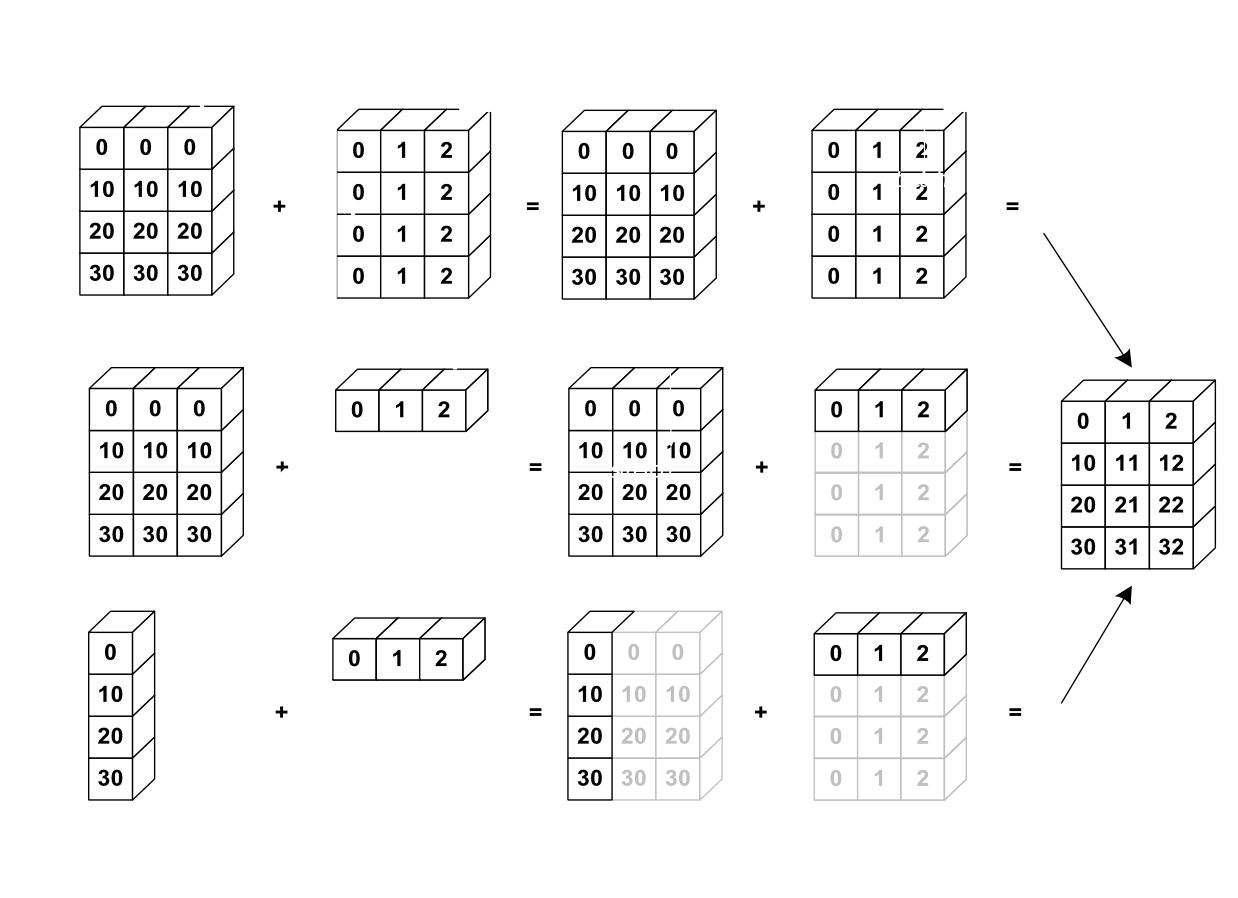

In [88]:
a = np.array([4, 5, 6])
b = np.array([2, 2, 2])
a * b

array([ 8, 10, 12])

In [89]:
a = np.array([4, 5, 6])
b = 2
a * b

array([ 8, 10, 12])

In [90]:
a = np.arange(10).reshape(1,10)
b = np.arange(12).reshape(12,1)

In [91]:
print(a)
print(b)

[[0 1 2 3 4 5 6 7 8 9]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [92]:
print(a * b)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]
 [ 0  5 10 15 20 25 30 35 40 45]
 [ 0  6 12 18 24 30 36 42 48 54]
 [ 0  7 14 21 28 35 42 49 56 63]
 [ 0  8 16 24 32 40 48 56 64 72]
 [ 0  9 18 27 36 45 54 63 72 81]
 [ 0 10 20 30 40 50 60 70 80 90]
 [ 0 11 22 33 44 55 66 77 88 99]]


## Linear algebra
Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

In [93]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [94]:
### Scalar-array operations
v1 = np.arange(0, 5)
v1 * 2

array([0, 2, 4, 6, 8])

In [95]:
### Element-wise array-array operations
# When we add, subtract, multiply and divide arrays with each other, the default behaviour is element-wise operations:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [96]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

To perform matrix multiplication in numpy xpu have two options:

    1)  use the `dot` function, which applies a matrix-matrix, matrix-vector 

    2)  apply inner vector multiplication to its two arguments 


In [97]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [98]:
# Alternatively, we can cast the array objects to the type `matrix`.
# This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [99]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [100]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [101]:
# inner product
v.T * v

matrix([[30]])

## Reshaping, resizing arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [102]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [103]:
n, m = A.shape

In [104]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [105]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [106]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [107]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [108]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [109]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Adding a new dimension: newaxis
With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [110]:
v = np.array([1,2,3])
v.shape

(3,)

In [111]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [112]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [113]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Copy and "deep copy"
To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [114]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [115]:
# now B is referring to the same array data as A 
B = A 

In [116]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [117]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [118]:
B = np.copy(A)

## Using arrays in conditions
When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [119]:
M

matrix([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34],
        [40, 41, 42, 43, 44]])

In [120]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [121]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("not all elements in M are larger than 5")

not all elements in M are larger than 5


## Matplotlib


In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
plt.rcParams['figure.figsize'] = [10, 7]

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like that a lot of people have learned to use and love, and an object-oriented API .

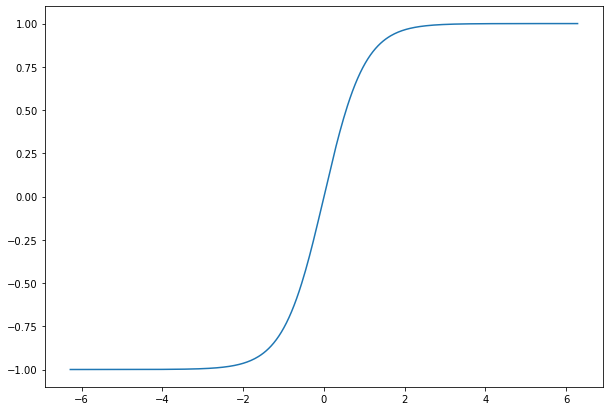

In [124]:
x = np.linspace(-2*np.pi, 2*np.pi, 400)
y = np.tanh(x)
fig, ax = plt.subplots()
ax.plot(x, y);

You can plot multiple subplots in the same figure, or multiple functions in the same subplot

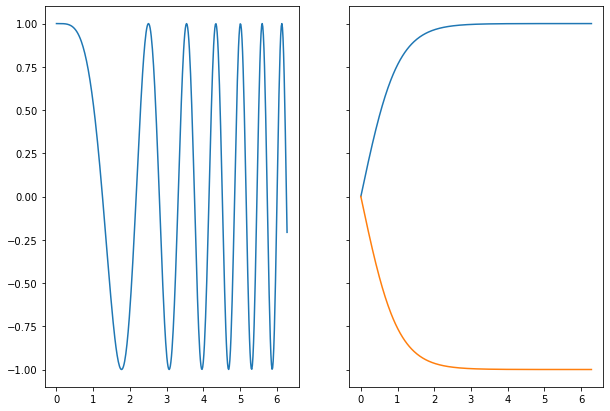

In [125]:
x = np.linspace(0, 2*np.pi, 400)
y1 = np.tanh(x)
y2 = np.cos(x**2)
fig, axes = plt.subplots(1, 2, sharey=True)
axes[1].plot(x, y1)
axes[1].plot(x, -y1)
axes[0].plot(x, y2)

## Scikit-learn 

[Scikit-learn](https://scikit-learn.org/) includes a number of features and utilities to kickstart your journey in Machine Learning. 

### A toy example

In [126]:
from sklearn.datasets import make_blobs

In [127]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

(array([[0.4666179 , 3.86571303],
        [2.84382807, 3.32650945],
        [0.61121486, 2.51245978],
        [3.81653365, 1.65175932],
        [1.28097244, 0.62827388]]),
 array([0, 0, 0, 1, 1]))

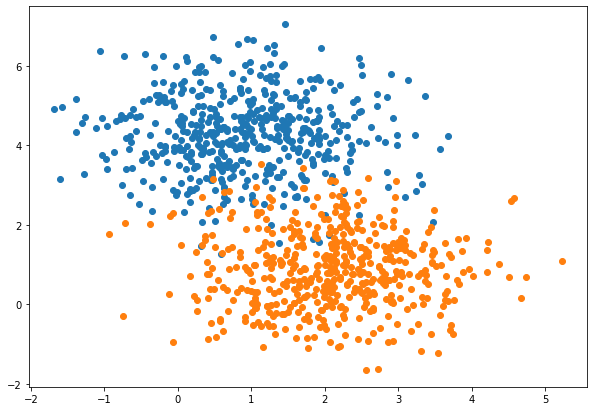

In [128]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

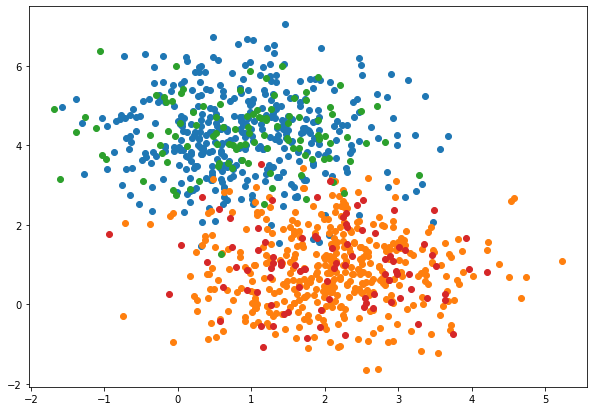

In [131]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

Sklearn uses a uniform and very consistent API, making it easy to switch algorithms

For instance, training and predicting with a perceptron.

In [132]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [133]:
clf = Perceptron(max_iter=40, random_state=0)
# clf = LinearSVC(max_iter=40, random_state=0)

### Further reading:
 - https://numpy.org/doc/stable/user/tutorials_index.html 
 - https://scikit-learn.org/stable/tutorial/index.html
 - https://cs231n.github.io/python-numpy-tutorial/
 
 Note: Most of the numpy functions presented in this notebook are heavily used when writing code for buiding and training neural networks. So please, take time to understand them and refer to additional resorces for further details.